# Introduction to Pytorch
Lecturers = R. Patrick Xian, Santosh Adhikari, Sourin Dey<br>
Date = 07/2022

[Pytorch cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

### Use of Pytorch nowadays (2022):
- ### Building research-grade deep learning models
- ### High-performance computational tools that benefits from [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) / autodifferentiation, such as those that directly include or can be translated into optimization problems
- ### Probabilistic inference engine
- ### Prototyping machine-learning apps

In [23]:
import torch
import numpy as np

In [274]:
# Let computation be carried out on the CPU
torch.device('cpu')

device(type='cpu')

## 1. Data types
### 1.1 ```torch.tensor``` / ```torch.Tensor```

In [7]:
ts = torch.tensor([[1, 2], [3, 4]])
ts

tensor([[1, 2],
        [3, 4]])

In [12]:
torch.is_tensor(ts)

True

In [20]:
# shape is a property for tensor object
ts.shape

torch.Size([2, 2])

In [17]:
# numel (number of elements) is a method for tensor object, which is equivalent to the size of numpy array
ts.numel()

4

In [22]:
# Equivalent to above
torch.numel(ts)

4

In [8]:
type(ts)

torch.Tensor

In [38]:
# Create torch tensor from 
# Compa
torch.linspace(0, 4, 9)

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000])

In [37]:
np.linspace(0, 4, 9, endpoint=True)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

### 1.2 Interoperability with ```numpy```
Conversion from ```numpy.ndarray``` to ```torch.tensor```

In [29]:
np.random.seed(0)
arr = np.random.randn(3, 4)
arr

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351]])

In [31]:
tarr = torch.from_numpy(arr)
tarr

tensor([[ 1.7641,  0.4002,  0.9787,  2.2409],
        [ 1.8676, -0.9773,  0.9501, -0.1514],
        [-0.1032,  0.4106,  0.1440,  1.4543]], dtype=torch.float64)

Conversion from ```torch.tensor``` to ```numpy.ndarray```

In [40]:
ts_arr = ts.numpy()
ts_arr

array([[1, 2],
       [3, 4]], dtype=int64)

### 1.3 Interoperability with ```pandas```
Conversion from ```pandas.DataFrame``` to ```torch.tensor```

In [143]:
import pandas as pd

In [149]:
df = pd.DataFrame(arr)
df

,0,1,2,3
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274


In [150]:
torch.tensor(df.values)

tensor([[ 1.7641,  0.4002,  0.9787,  2.2409],
        [ 1.8676, -0.9773,  0.9501, -0.1514],
        [-0.1032,  0.4106,  0.1440,  1.4543]], dtype=torch.float64)

Conversion from ```torch.tensor``` to ```pandas.DataFrame```

In [145]:
pd.DataFrame(tarr.numpy())

,0,1,2,3
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274


## 2. Building deep learning models
### 2.0 Essentials for machine learning models
A machine learning-ready question requires the following ingredients
1. A question to solve along with mathematical formulation
2. At least one relevant dataset paired with features ($X$, $y$)
3. Predictive model $M$ (including algorithm and architecture)
4. Optimization method / optimizer
5. Error metric / Loss function / Objective function $L$
6. Model training method or scheduler
7. Hyperparameter tuner

Nice to have
1. Prediction benchmarks
2. Alternative / New datasets
3. Deployment platform

### 2.1 Neural network basics

A neural network is an overparametrized functional approximator. It is modeled loosely after neural networks in animal and human brains.

#### [Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) (Hornik 1991): A neural network with a hidden layer of infinite width can approximate any function.

Single layer neural network: $f_1 = g(w^TX + b)$
<br>
N-layer neural network: $f_N = g(w_N^T(w_{N-1}^T(...(w_1^Tx + b_1) + b_{N-1}) + b_N)$
<img src="NN.png" alt="isolated" width="500"/>

In [152]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### 2.2 A neural network that simulates the XOR operator (a [Boolean function](https://en.wikipedia.org/wiki/Boolean_function))

- Why XOR? (XOR = exclusive or)<br>
XOR is the simplest nonlinear function with a vector input and scalar output, with the following truth table

| A | B | A XOR B |
|---|---|---------|
| 0 | 0 | 0       |
| 0 | 1 | 1       |
| 1 | 0 | 1       |
| 1 | 1 | 0       |

<br>
We need to use the neural network as a function approximator $f_{\mathrm{NN}}$ to represent the Boolean function XOR, such that $f_{\mathrm{NN}} \sim$ XOR


Loss function: mean squared error $\sum_i(y_i - \hat{y_i})^2 / N$ for $N$ data points

Optimizer: [Adam](https://arxiv.org/abs/1412.6980), a first-order stochastic gradient descent-based optimizer

#### (1) Collect or generate training data

In [48]:
Xs = torch.tensor([[0., 0.],
                   [0., 1.],
                   [1., 0.],
                   [1., 1.]])

y = torch.tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1)

#### (2) Build neural network

In [197]:
# Construct a neural network called XORNet

class XORNet(nn.Module):
    
    def __init__(self):
        super(XORNet, self).__init__()
        
        # Set the first linear layer
        self.linear1 = nn.Linear(2, 2)
        
        # Set the activation function
        self.Sigmoid = nn.Sigmoid()
        
        # Set the output layer
        self.linear2 = nn.Linear(2, 1)
    
    # Define forward pass through the neural network
    def forward(self, input):
        
        x = self.linear1(input)
        sig = self.Sigmoid(x)
        yh = self.linear2(sig)
        
        return yh

#### (3) Initiate and summarize model

In [311]:
# Initiate neural network
xor_network = XORNet()

try:
    from torchsummary import summary
    summary(xor_network, verbose=1)
except:
    !pip install torch-summary
    print('Please run this cell again after installation!')

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            6
├─Sigmoid: 1-2                           --
├─Linear: 1-3                            3
Total params: 9
Trainable params: 9
Non-trainable params: 0


#### (4) Determine network training settings
Including but are not limited to
- loss function
- optimizer and hyperparameters (learning rate, weight decay, etc.)
- number of training epochs

In [312]:
# Set total training epochs
epochs = 800

# Define training loss function
mseloss = nn.MSELoss()

# Select and initialize the optimizer
optimizer = optim.Adam(xor_network.parameters(), lr = 0.03)

all_losses = [] 
current_loss = 0
sample_every = 50

#### (5) Model training (and hyperparameter tuning)

In [313]:
# Loop over each training epoch
for epoch in range(epochs): 
   
    # input training example and return the prediction   
    yhat = xor_network.forward(Xs)
    
    # calculate MSE loss   
    loss = mseloss(yhat, y)
      
    # backpropogate through the loss gradiants   
    loss.backward()
    
    # update model weights   
    optimizer.step()
    
    # remove current gradients for next iteration   
    optimizer.zero_grad() 
   
    # append to loss   
    current_loss += loss  
 
    if epoch % sample_every == 0:       
        all_losses.append(current_loss / sample_every)       
        current_loss = 0
     
    # print progress every sample_every*2 epochs
    if epoch % (sample_every*2) == 0:
        print('Epoch: {} completed'.format(epoch))

Epoch: 0 completed
Epoch: 100 completed
Epoch: 200 completed
Epoch: 300 completed
Epoch: 400 completed
Epoch: 500 completed
Epoch: 600 completed
Epoch: 700 completed


In [314]:
xor_network

XORNet(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (Sigmoid): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)

#### (6) Visualize loss function during the training of the neural network

Text(0.5, 0, 'Training epoch')

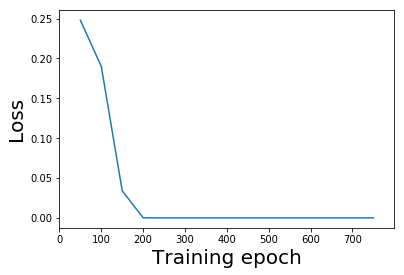

In [315]:
n_sampled = int(epochs / sample_every)
sampled_epochs = [i*sample_every for i in range(n_sampled)]

plt.plot(sampled_epochs[1:], all_losses[1:])
plt.ylabel('Loss', fontsize=20);
plt.xticks(range(0, epochs, 100))
plt.xlim([0, epochs])
plt.xlabel('Training epoch', fontsize=20)

In [316]:
# Print out the neural network parameters
for name, param in xor_network.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear1.weight tensor([[-4.6231, -4.4772],
        [-2.9024, -2.8796]])
linear1.bias tensor([1.0845, 3.6311])
linear2.weight tensor([[-2.1656,  1.8595]])
linear2.bias tensor([-0.1931])


#### (7) Test out the trained model

In [317]:
# for input_vector in Xs:

#     # Calculate prediction outcome
#     out = xor_network(input_vector)
#     invec = input_vector.detach().numpy()
#     outval = out.round().detach().numpy()
#     print('Input = {}, output = {}'.format(invec, outval))

In [318]:
def eval_model(data, model, verbose=False):
    """ Evaluate model given data.
    """
    
    results = []
    for datum in data:
        result = model(datum)
        results.append(result)
        
        # If the verbose option is specified, print out the intermediate outcomes.
        if verbose:
            datum_vec = datum.detach().numpy()
            res_vec = result.round().detach().numpy()
            print('Input = {}, output = {}'.format(datum_vec, res_vec))
            
    return results

In [319]:
eval_model(Xs, xor_network, verbose=True);

Input = [0. 0.], output = [-0.]
Input = [0. 1.], output = [1.]
Input = [1. 0.], output = [1.]
Input = [1. 1.], output = [0.]


## 3. Model storage and reuse
### 3.1 What constitutes a model and what needs to be stored?

- Weight matrices (w), biases (b), network architecture (hyper)parameters (**must-haves**)
- Optimization (hyper)parameters
- Data parameters

In [286]:
xor_network.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-5.2579,  5.4862],
                      [ 2.7224, -2.7568]])),
             ('linear1.bias', tensor([-3.6438, -1.2806])),
             ('linear2.weight', tensor([[1.6142, 1.7604]])),
             ('linear2.bias', tensor([-0.4239]))])

### 3.2 Storing and loading model using the Pytorch format
Save Pytorch model to file with extension ```.pt``` or ```.pth```

In [158]:
torch.save({'xor_net':xor_network.state_dict()}, r'.\xor_nn.pt')

In [182]:
## Check that the model is exported
# !ls

Load the trained Pytorch neural network model

In [165]:
xor_nn_dict = torch.load(r'.\xor_nn.pt')['xor_net']
xor_nn_dict

OrderedDict([('linear1.weight',
              tensor([[-2.6372, -2.6383],
                      [-3.5483, -3.5519]])),
             ('linear1.bias', tensor([3.4040, 0.8121])),
             ('linear2.weight', tensor([[ 2.0913, -2.5266]])),
             ('linear2.bias', tensor([-0.2742]))])

In [185]:
xor_nn = XORNet()
xor_nn.load_state_dict(xor_nn_dict)
xor_nn.eval()

XORNet(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (Sigmoid): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)

In [193]:
# Evaluate loaded network
eval_model(Xs, xor_nn, verbose=True);

Input = [0. 0.], output = [0.]
Input = [0. 1.], output = [1.]
Input = [1. 0.], output = [1.]
Input = [1. 1.], output = [0.]


### 3.3 Storing model using the [ONNX](https://onnx.ai/) (Open Neural Network Exchange) format
We use the [Pytorch specification of ONNX](https://pytorch.org/docs/master/onnx.html). The rationale in converting to ```.onnx``` is its faster deployment

In [ ]:
import torch.onnx as tonnx

In [141]:
tonnx.export(xor_network, Xs, r'.\xor_nn.onnx')

In [139]:
## Check that the model is exported
# !ls

In [321]:
import onnx

# If not installed, please do command line installation
# conda install -c conda-forge onnx

In [322]:
model = onnx.load(r'.\xor_nn.onnx')

In [323]:
print(model)

ir_version: 6
producer_name: "pytorch"
producer_version: "1.9"
graph {
  node {
    input: "input.1"
    input: "linear1.weight"
    input: "linear1.bias"
    output: "5"
    name: "Gemm_0"
    op_type: "Gemm"
    attribute {
      name: "alpha"
      f: 1.0
      type: FLOAT
    }
    attribute {
      name: "beta"
      f: 1.0
      type: FLOAT
    }
    attribute {
      name: "transB"
      i: 1
      type: INT
    }
  }
  node {
    input: "5"
    output: "6"
    name: "Sigmoid_1"
    op_type: "Sigmoid"
  }
  node {
    input: "6"
    input: "linear2.weight"
    input: "linear2.bias"
    output: "7"
    name: "Gemm_2"
    op_type: "Gemm"
    attribute {
      name: "alpha"
      f: 1.0
      type: FLOAT
    }
    attribute {
      name: "beta"
      f: 1.0
      type: FLOAT
    }
    attribute {
      name: "transB"
      i: 1
      type: INT
    }
  }
  name: "torch-jit-export"
  initializer {
    dims: 2
    dims: 2
    data_type: FLOAT
    name: "linear1.weight"
    raw_data: "